In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.font_manager import FontProperties
from  matplotlib import cm
from matplotlib import font_manager as fm

In [2]:
data_origin=pd.read_csv("final_619_0806.csv")
data=data_origin

In [3]:
#將票房資料轉成純數字
for col  in["opening_weekend","gross_na"]:
    data[col]=data[col].replace("$0",np.nan)
    data[col]=data[col].str.replace("$","")
    data[col]=data[col].str.replace(",","")  
    data[col]=data[col].astype(float)

In [4]:
#清除票房與預算的空值
data=data[data["gross_na"].notna()].reset_index(drop=True)
data=data[data["budget_in_USD"].notna()].reset_index(drop=True)

In [5]:
#runtime轉成純數字
data["runtime"]=data["runtime"].str.replace("min","").astype(int)
#搜尋量為error的轉成0
for i in ['movie_8_before',
       'movie_7_before', 'movie_6_before', 'movie_5_before', 'movie_4_before',
       'movie_3_before', 'movie_2_before', 'movie_1_before', 'movie_0_before',
       'movie_1_after', 'movie_2_after', 'movie_3_after', 'movie_4_after',
       'movie_5_after', 'movie_6_after', 'movie_7_after', 'movie_8_after',
       'Actor_8_before', 'Actor_7_before', 'Actor_6_before', 'Actor_5_before',
       'Actor_4_before', 'Actor_3_before', 'Actor_2_before', 'Actor_1_before',
       'Actor_0_before', 'Actor_1_after', 'Actor_2_after', 'Actor_3_after',
       'Actor_4_after', 'Actor_5_after', 'Actor_6_after', 'Actor_7_after',
       'Actor_8_after', 'Cmovie_8_before', 'Cmovie_7_before',
       'Cmovie_6_before', 'Cmovie_5_before', 'Cmovie_4_before',
       'Cmovie_3_before', 'Cmovie_2_before', 'Cmovie_1_before',
       'Cmovie_0_before', 'Cmovie_1_after', 'Cmovie_2_after', 'Cmovie_3_after',
       'Cmovie_4_after', 'Cmovie_5_after', 'Cmovie_6_after', 'Cmovie_7_after',
       'Cmovie_8_after']:
    data[i]= data[i].replace("error","0")

In [6]:
#將年月日拆開成三個欄位並轉成純數字
def month(m):
    mon={
        "Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,
        "Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12
    }
    return mon.get(m)

data = data[data["release_date_USA"].notna()].reset_index(drop=True)

mon=[]
_year=[]
day=[]
for i in data["release_date_USA"]:
    mon.append(month(i.split("-")[1]))
    _year.append(i.split("-")[2])
    day.append(i.split("-")[0])
    
    
year_df=pd.DataFrame({"_year":_year})
day_df=pd.DataFrame({"day":day})
mon_df=pd.DataFrame({"mon":mon})
data=pd.concat([data,year_df],axis=1)
data=pd.concat([data,mon_df],axis=1)
data=pd.concat([data,day_df],axis=1)
data["_year"]=("20"+data["_year"]).astype(int)
data["day"]=data["day"].astype(int)

In [7]:
#篩選欄位
data_use=data
for col in [ 'Unnamed: 0','year', 'gross_g',
       'release_date', 'gross_tw', 'gross_cn', 'gross_hk', 'gross_my',
       'gross_sg', 'gross_xndom', 'release_date_USA', 'Genre', 'Director',
       'Writer', 'Actors', 'Language', 'Awards', 'Country', 'Production', 'ChineseName',
       'TaiwanRelease', 'Domestic_box_office', 'International_box_office',
       'Worldwide_box_office', 'movie_1_after', 'movie_2_after', 'movie_3_after', 'movie_4_after',
       'movie_5_after', 'movie_6_after', 'movie_7_after', 'movie_8_after', 'Actor_1_after', 'Actor_2_after', 'Actor_3_after',
       'Actor_4_after', 'Actor_5_after', 'Actor_6_after', 'Actor_7_after',
       'Actor_8_after', 'Cmovie_8_before', 'Cmovie_7_before',
       'Cmovie_6_before', 'Cmovie_5_before', 'Cmovie_4_before',
       'Cmovie_3_before', 'Cmovie_2_before', 'Cmovie_1_before',
       'Cmovie_0_before', 'Cmovie_1_after', 'Cmovie_2_after', 'Cmovie_3_after',
       'Cmovie_4_after', 'Cmovie_5_after', 'Cmovie_6_after', 'Cmovie_7_after',
       'Cmovie_8_after']:
    data_use=data_use.drop(col,axis=1)


In [8]:
#新增一個欄位(獲利 or 不獲利)
data_use["profit"]=data_use["gross_na"]-data["budget_in_USD"]
data_use["profit"][data_use["profit"]>0]="profit"
data_use["profit"][data_use["profit"]!="profit"]="non_profit"

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
#更改欄位名稱(方便畫圖時的軸名稱)
i=8
for col in ['movie_8_before',
       'movie_7_before', 'movie_6_before', 'movie_5_before', 'movie_4_before',
       'movie_3_before', 'movie_2_before', 'movie_1_before', 'movie_0_before',
       ]:
    data_use[col]=data_use[col].astype(int)
    temp="上映前"+str(i)+"周電影搜尋量"
    data_use=data_use.rename(columns={col:temp})
    i-=1

i=8
for col in [
       'Actor_8_before', 'Actor_7_before', 'Actor_6_before', 'Actor_5_before',
       'Actor_4_before', 'Actor_3_before', 'Actor_2_before', 'Actor_1_before',
       'Actor_0_before']:
    data_use[col]=data_use[col].astype(int)
    temp="上映前"+str(i)+"周演員搜尋量"
    data_use=data_use.rename(columns={col:temp})
    i-=1


data_use=data_use.rename(columns={'gross_na':'票房'})

data_use=data_use.rename(columns={'Theater_num':'廳數'})


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<Figure size 2160x1440 with 0 Axes>

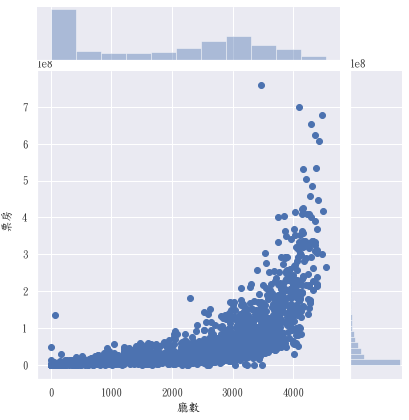

In [14]:
#關注廳數
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(30,20)})#11.7,8.27
plt.figure()
#ax1=plt.subplot(1,1,1)
plot = sns.jointplot(x="廳數", y="票房", data=data_use[data_use["廳數"].notna()][data_use["name"]!="Sweetwater"])
#ax1.set_xlabel("上映廳數")
plot.savefig("關注廳數.jpg",dpi=300)

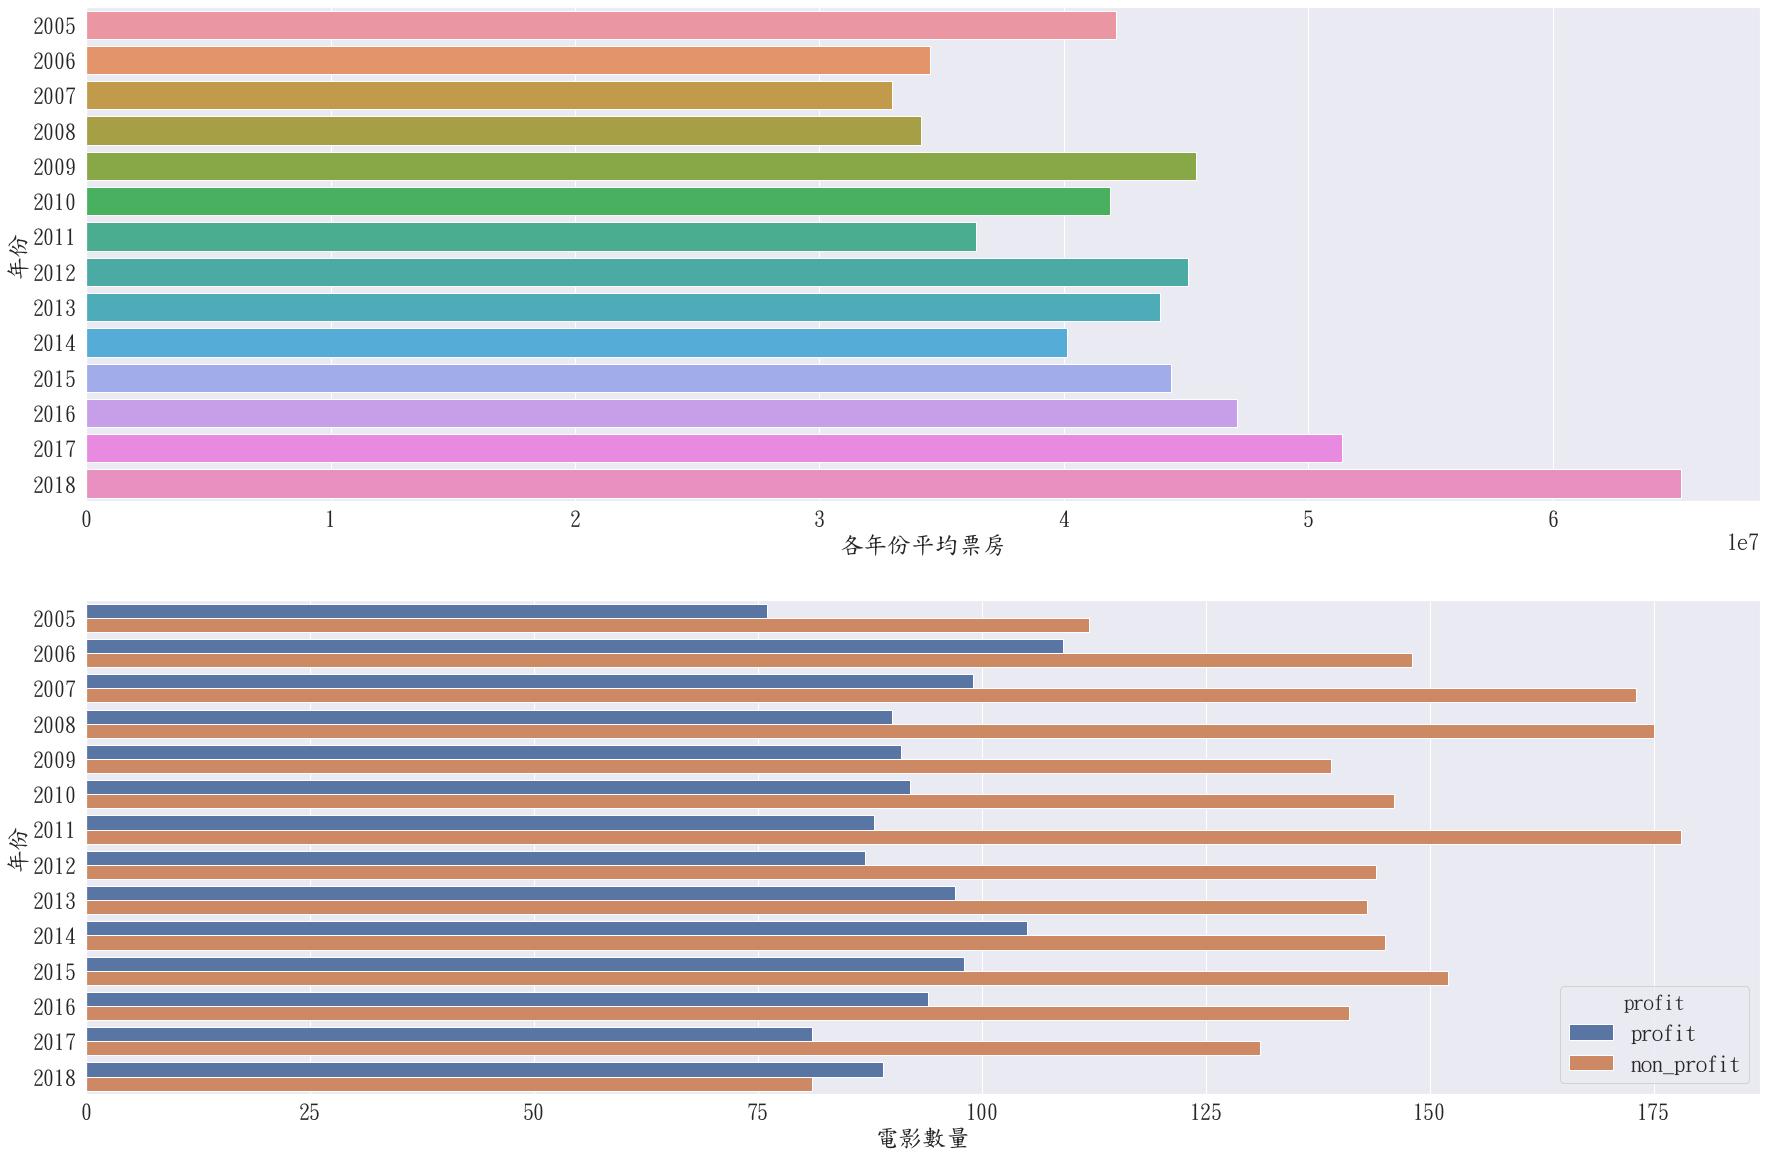

In [15]:
#各年份平均票房
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(30,20)},font_scale=2)#11.7,8.27
plt.figure()
ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,1,2) 

list_temp=[]
for i in range(2005,2019):
    list_temp.append(data_use["票房"][data_use["_year"]==i ].mean())
dic={"年份":[i for i in range(2005,2019)],"各年份平均票房":list_temp}
df_byyear=pd.DataFrame(dic)
plot=sns.barplot(x="各年份平均票房",y="年份",data=df_byyear,orient="h" , ax=ax1) 

plot=sns.countplot(y="_year",data=data_use[data["_year"]!=2019],orient="h",hue="profit",ax=ax2)

ax2.set_ylabel("年份")
ax2.set_xlabel("電影數量")

fig=plot.get_figure()
fig.savefig("關注年份.jpg",dpi=300)


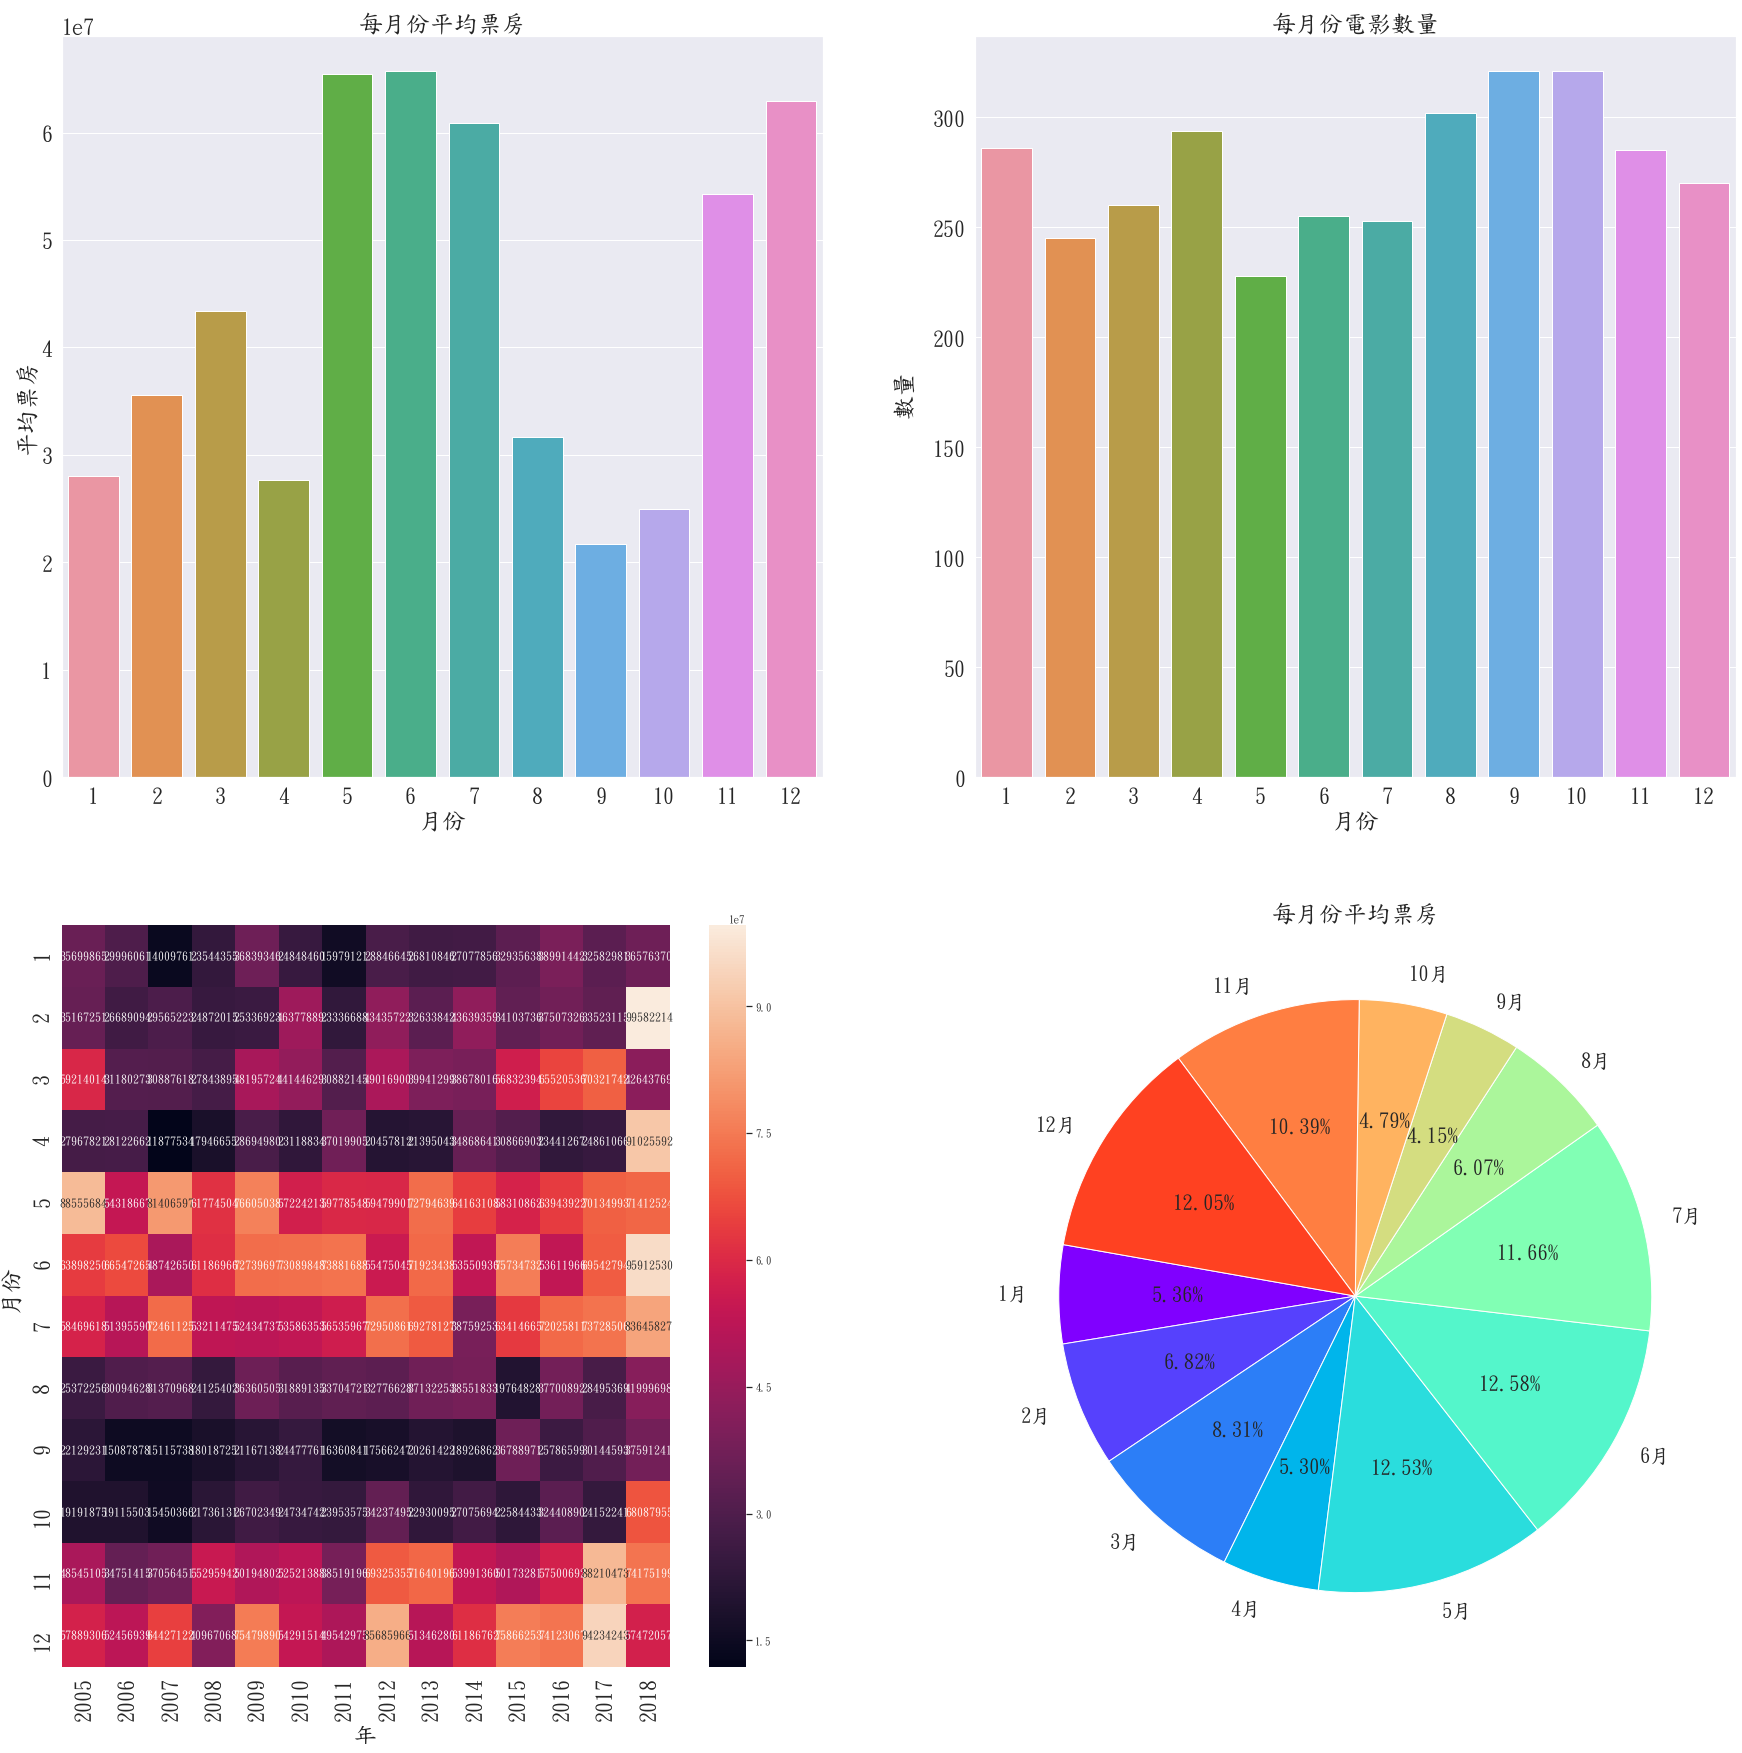

In [16]:
#關注月份
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(30,30)},font_scale=2)#11.7,8.27
plt.figure()
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)            
ax4=plt.subplot(2,2,4) 

list_temp=[]
for i in range(1,13):
    list_temp.append(data_use["票房"][data_use["mon"]==i ].mean())
dic={"月份":[i for i in range(1,13)],"平均票房":list_temp}
df_bymon=pd.DataFrame(dic)
plot=sns.barplot(x="月份",y="平均票房",data=df_bymon, ax=ax1)
ax1.title.set_text('每月份平均票房')
plot=sns.countplot(x="mon", data=data_use,ax=ax2)
ax2.set_xlabel("月份")
ax2.set_ylabel("數量")
ax2.title.set_text('每月份電影數量')

myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(30,30)})#11.7,8.27

sizes=[]
for i in df_bymon["平均票房"]:
    sizes.append(i/(df_bymon["平均票房"].sum())*100)
    
colors = cm.rainbow(np.arange(len(sizes))/len(sizes))
patches, texts, autotexts=ax4.pie(sizes, labels=df_bymon["月份"].astype(str)+"月", autopct='%1.2f%%',
        shadow=False, startangle=170,colors=colors)
ax4.title.set_text('每月份平均票房')
proptease = fm.FontProperties()
proptease.set_size('xx-large')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

year_temp=[]
for i in range(2005,2019):
    for j in range(12):
        year_temp.append(i)  
mon_temp=[]
for i in range(14):
    for j in range(1,13):
        mon_temp.append(j)  
gross_temp=[]
for i in range(2005,2019):
    for j in range(1,13):
        avg=data_use["票房"][(data_use["_year"]==i) & (data_use["mon"]==j)].mean()
        gross_temp.append(avg)
dic={"年":year_temp,"月份":mon_temp,"gross_avg":gross_temp}    
data_heatmap=pd.DataFrame(dic)
data_heatmap["gross_avg"]=data_heatmap["gross_avg"].fillna(0)
data_heatmap["gross_avg"]=data_heatmap["gross_avg"].astype(int)
test=data_heatmap.pivot("月份","年","gross_avg")
plot = sns.heatmap(test, annot=True, fmt="d",ax=ax3)


fig=plot.get_figure()
fig.savefig("關注月份.jpg",dpi=300)    

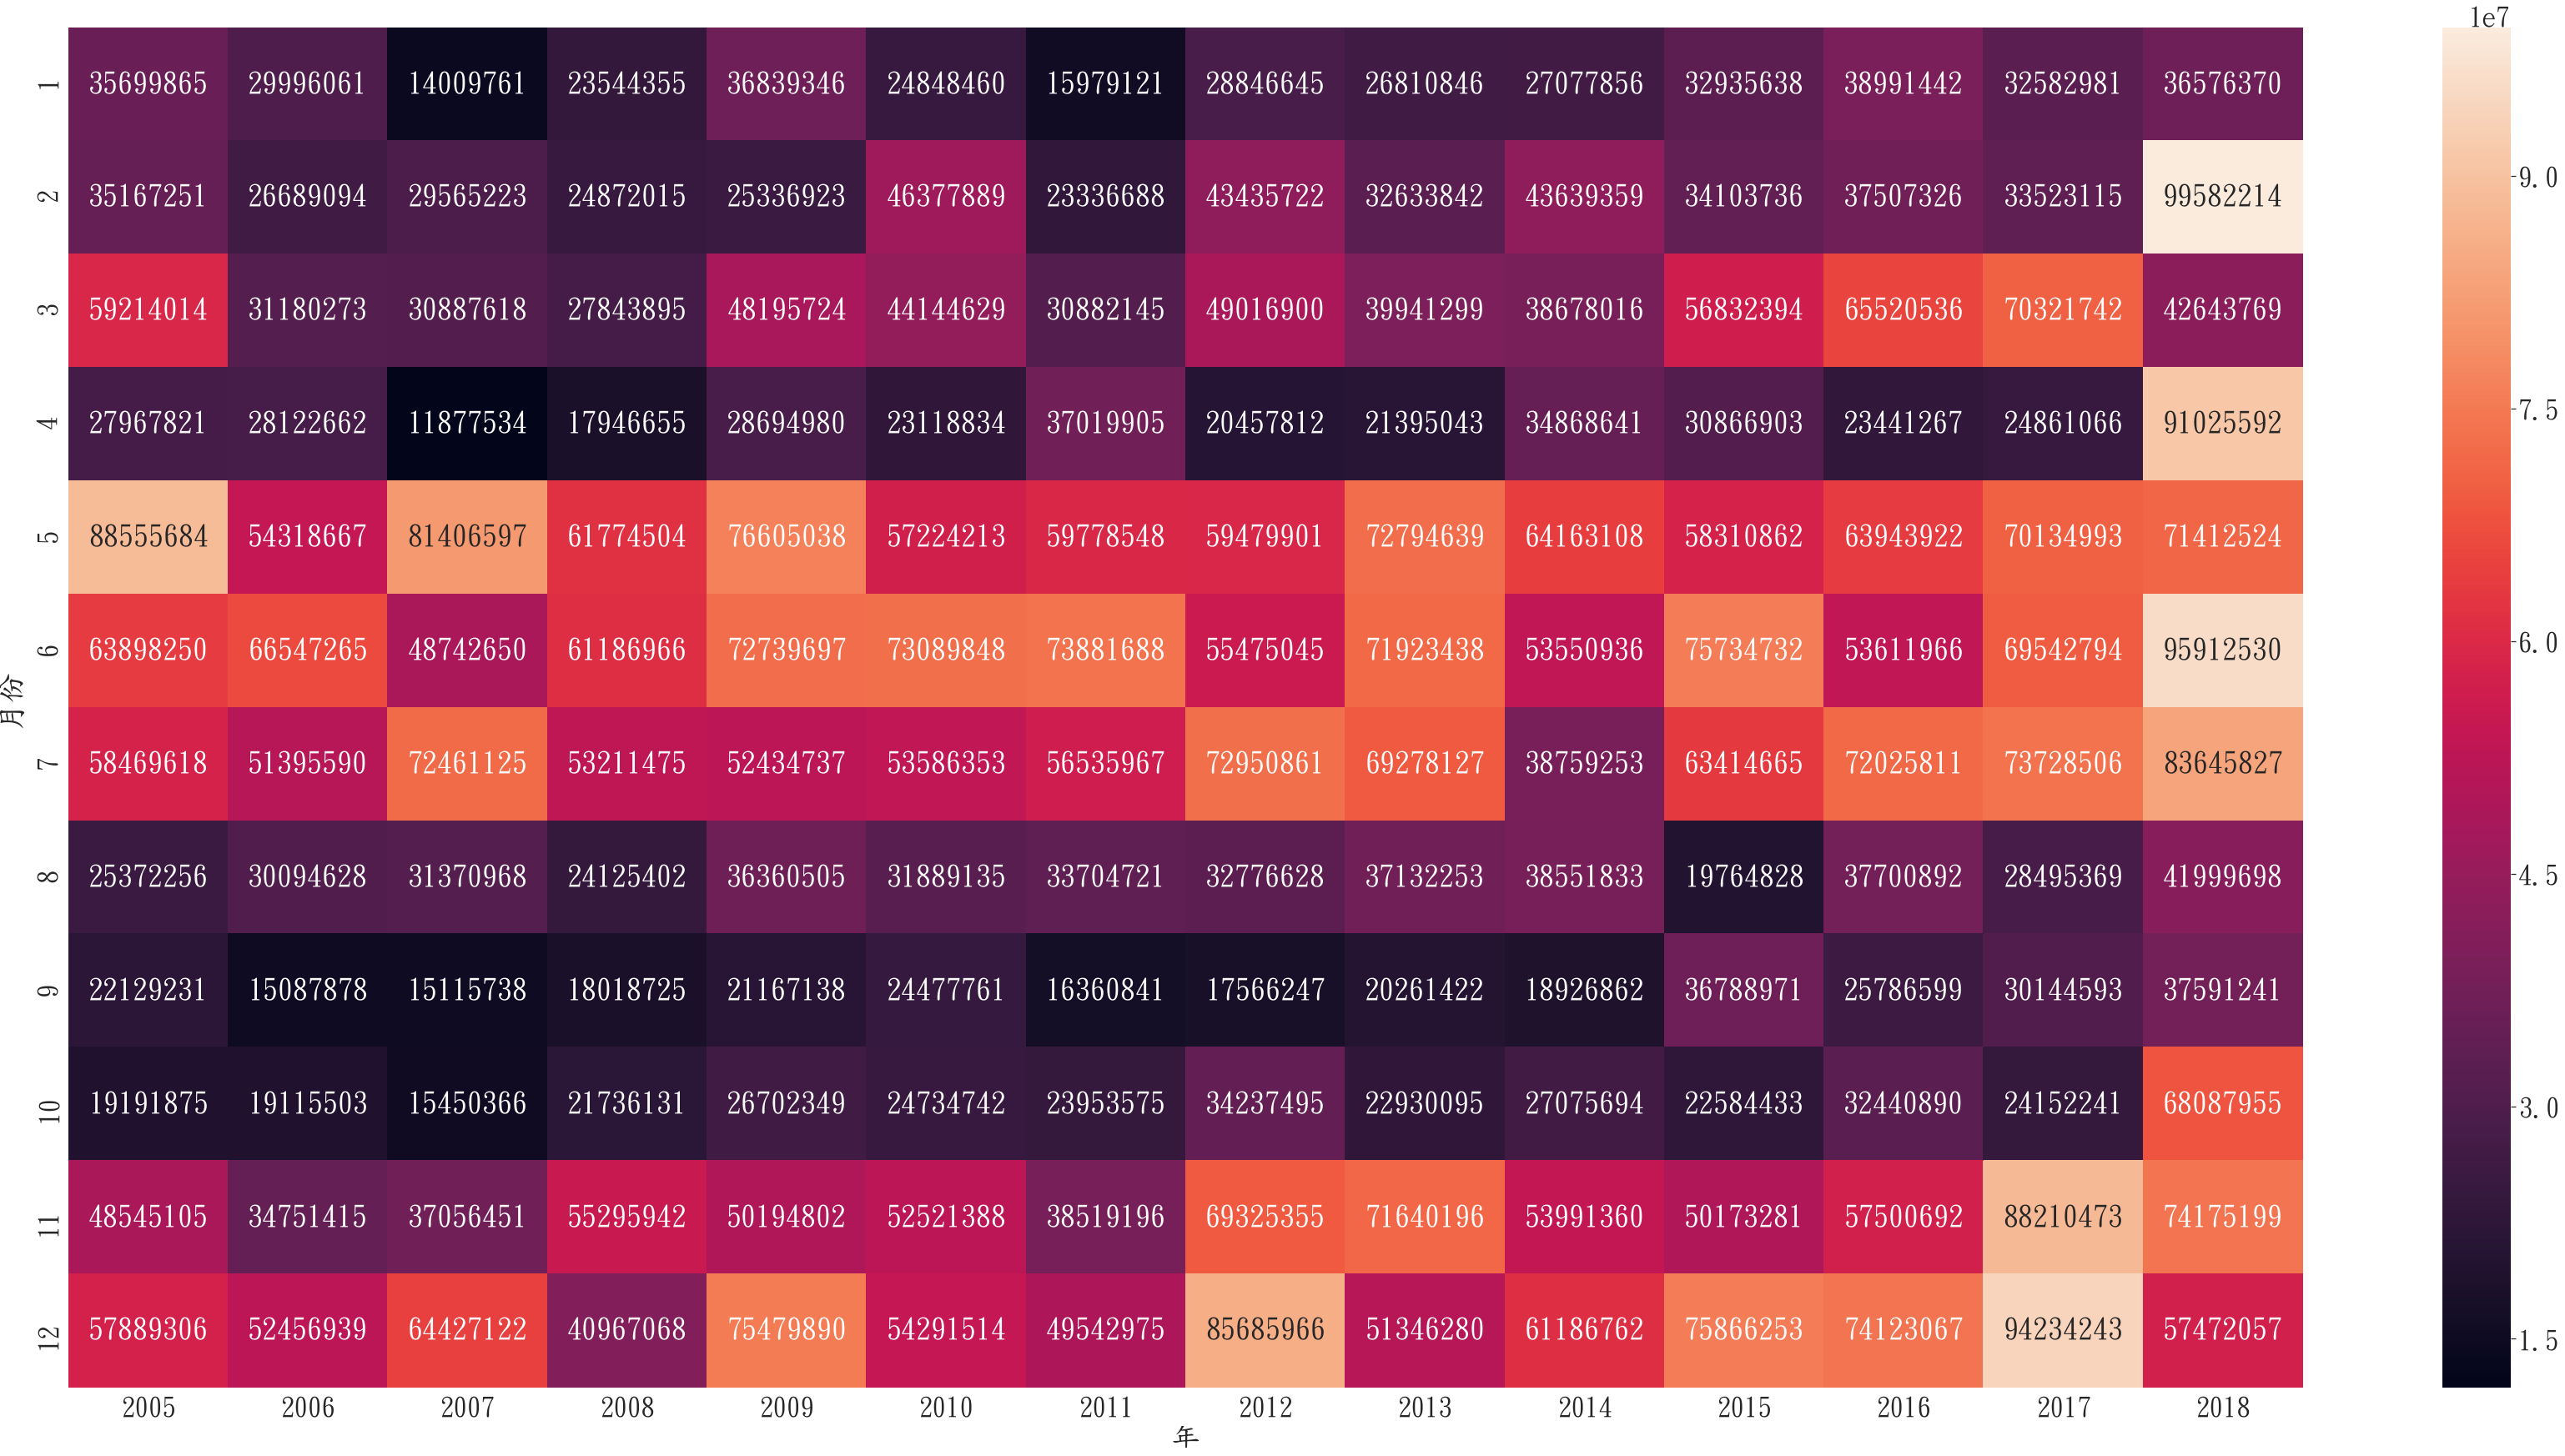

In [18]:
#單畫熱度圖
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(60,30)},font_scale=3)#11.7,8.27

test=data_heatmap.pivot("月份","年","gross_avg")
plot = sns.heatmap(test, annot=True, fmt="d")

fig=plot.get_figure()
fig.savefig("熱度圖.jpg",dpi=300) 

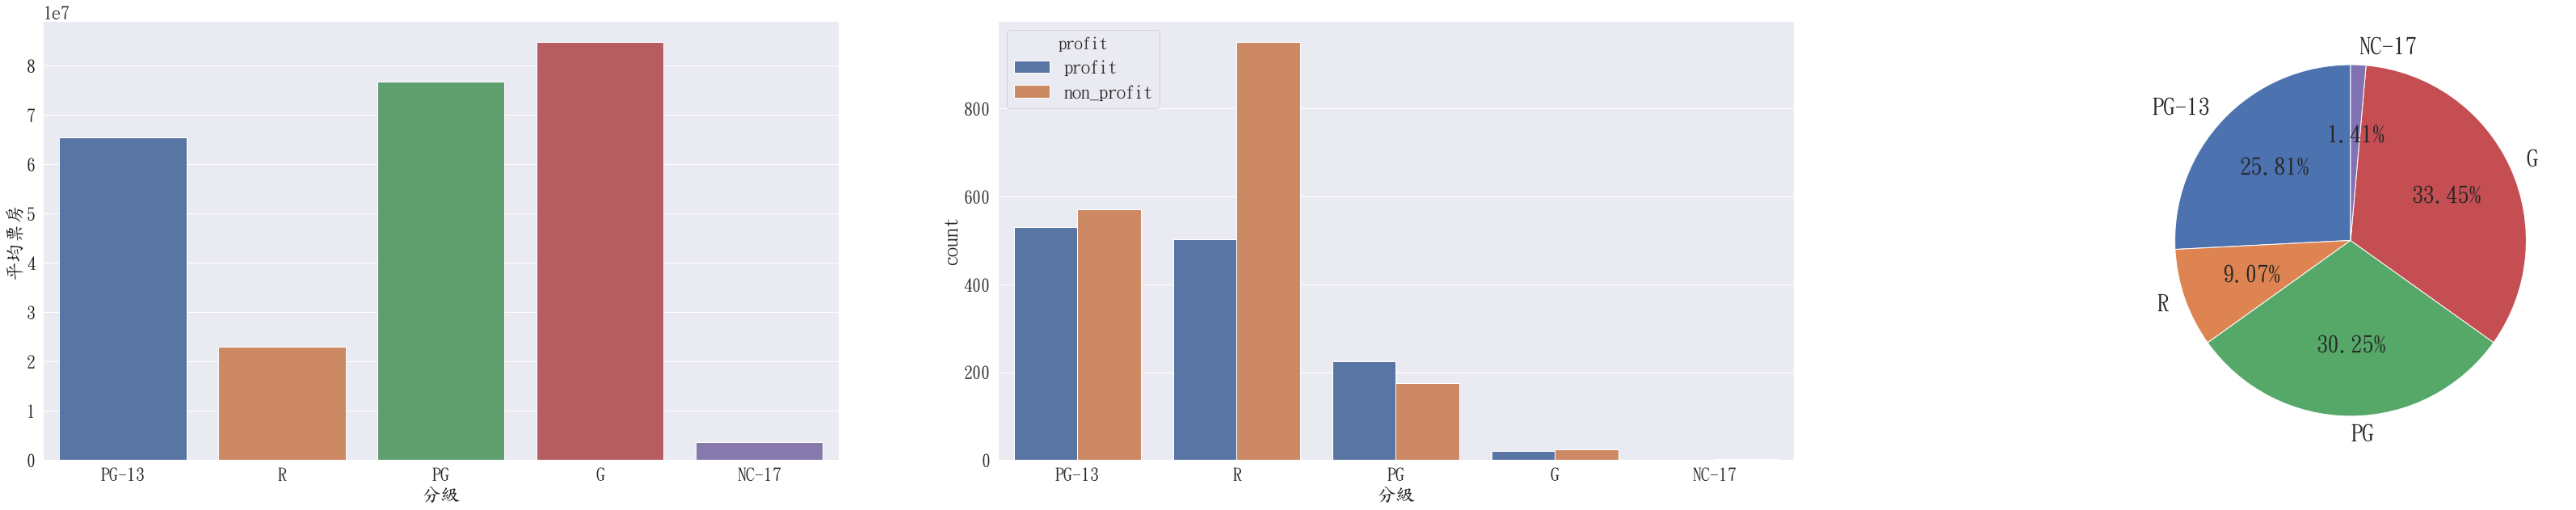

In [17]:
#關注電影分級
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=40)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(60,10)},font_scale=2)#11.7,8.27

plt.figure()
ax1=plt.subplot(1,3,1)
ax2=plt.subplot(1,3,2)
ax3=plt.subplot(1,3,3)            


for i in[ 'NotRated', 'Unrated', 'TV-PG','TV-MA', 'TV-14']:
    data_use["classification"]=data_use["classification"].str.replace(i,"other")
data_use_cla=data_use[data_use["classification"]!="other"]
list_temp=[]
for i in data_use_cla["classification"].unique():
    list_temp.append(data_use_cla["票房"][data_use_cla["classification"]==i ].mean())
dic={"分級":[i for i in data_use_cla["classification"].unique()],"平均票房":list_temp}
df_byclass=pd.DataFrame(dic)
plot=sns.barplot(x="分級",y="平均票房",data=df_byclass,ax=ax1)   
plot=sns.countplot(x="classification",data=data_use_cla,ax=ax2,hue="profit") 
ax2.set_xlabel("分級")
size=[]
for i in df_byclass["平均票房"]:
    size.append(i/(df_byclass["平均票房"].sum())*100)

patches, texts, autotexts=ax3.pie(size, labels=df_byclass["分級"], autopct='%1.2f%%',
        shadow=False, startangle=90)
proptease = fm.FontProperties()
proptease.set_size('large')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)


fig=plot.get_figure()
fig.savefig("關注分級.jpg",dpi=300)     

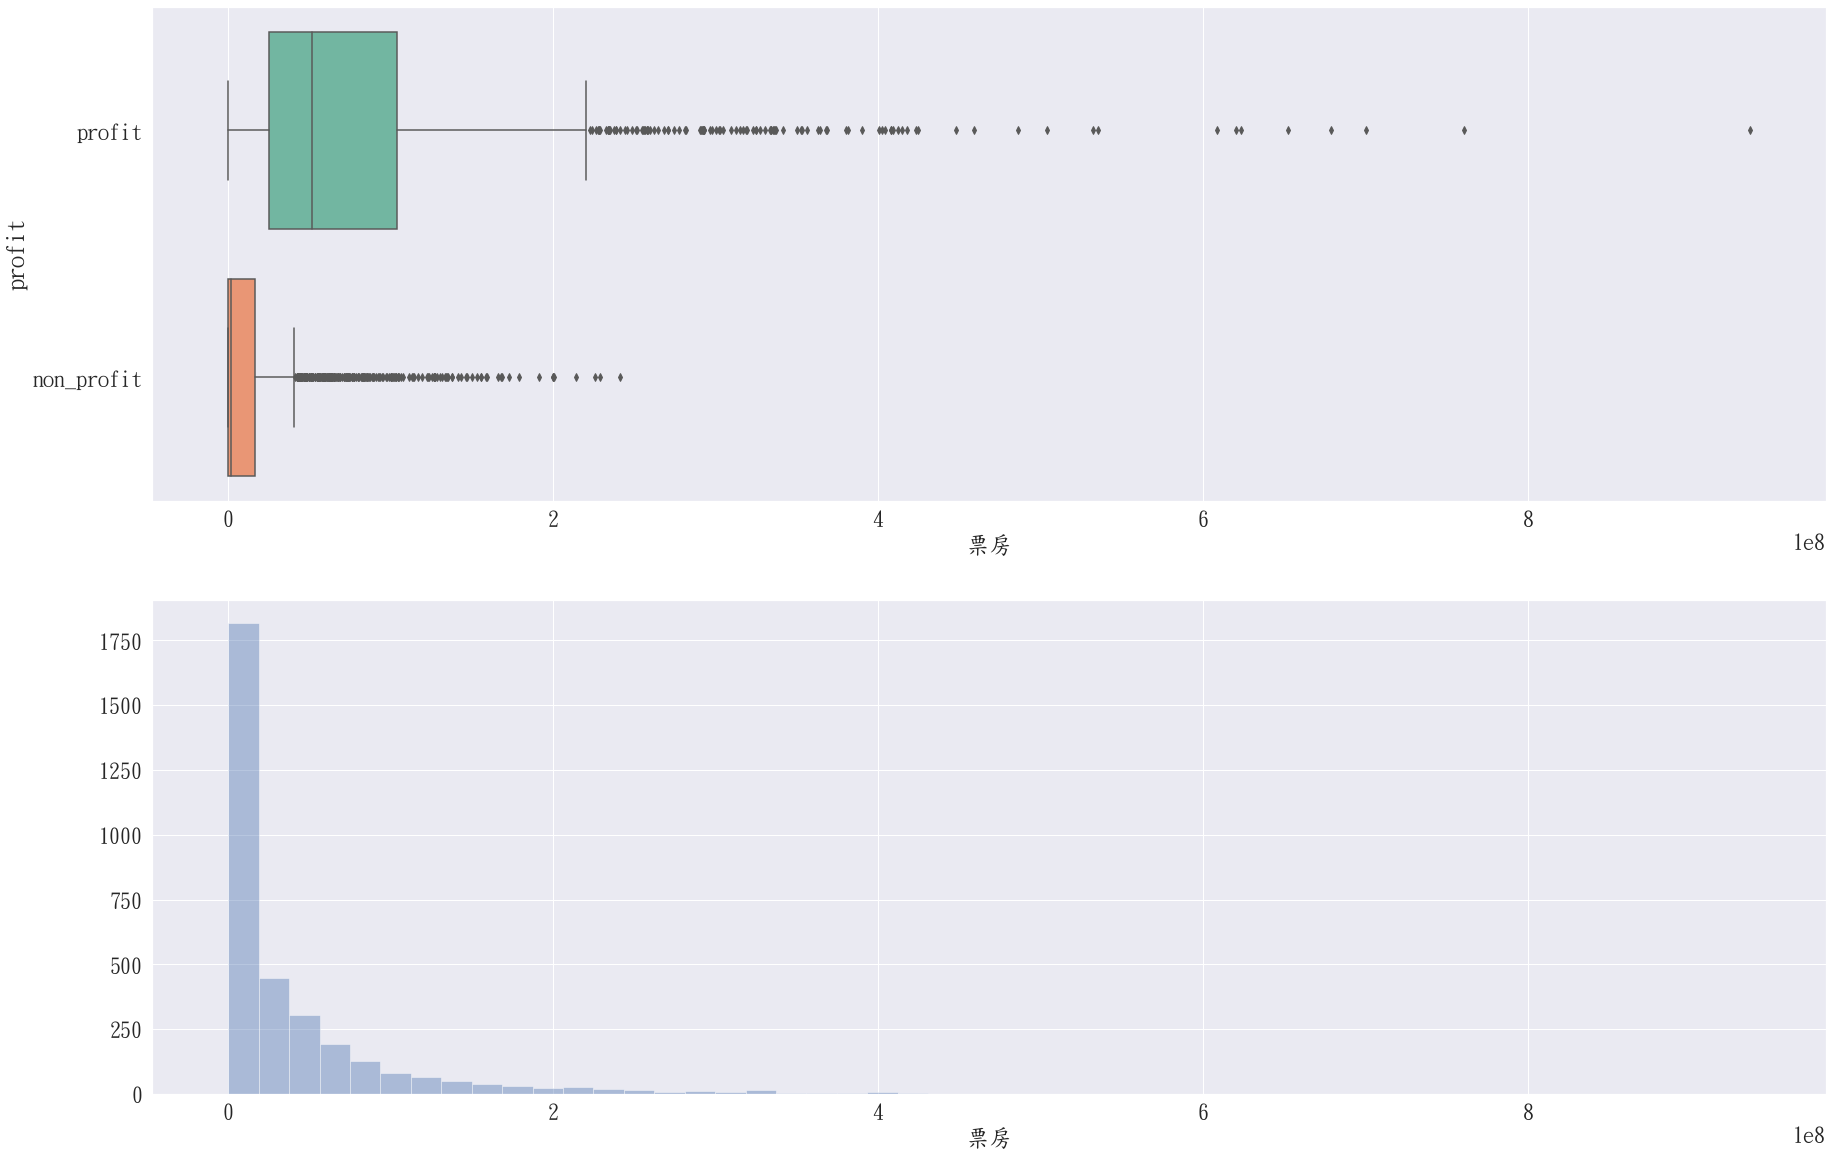

In [19]:
#關注票房
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(30,20)},font_scale=2)
plt.figure()
ax1=plt.subplot(2,1,1)
ax2=plt.subplot(2,1,2)
plot=sns.boxplot(x=data_use["票房"],y=data_use["profit"],ax=ax1,palette="Set2")
plot=sns.distplot(data_use["票房"],kde=False,norm_hist=False,ax=ax2)
fig=plot.get_figure()
fig.savefig("關注票房.jpg",dpi=300)#kde=False

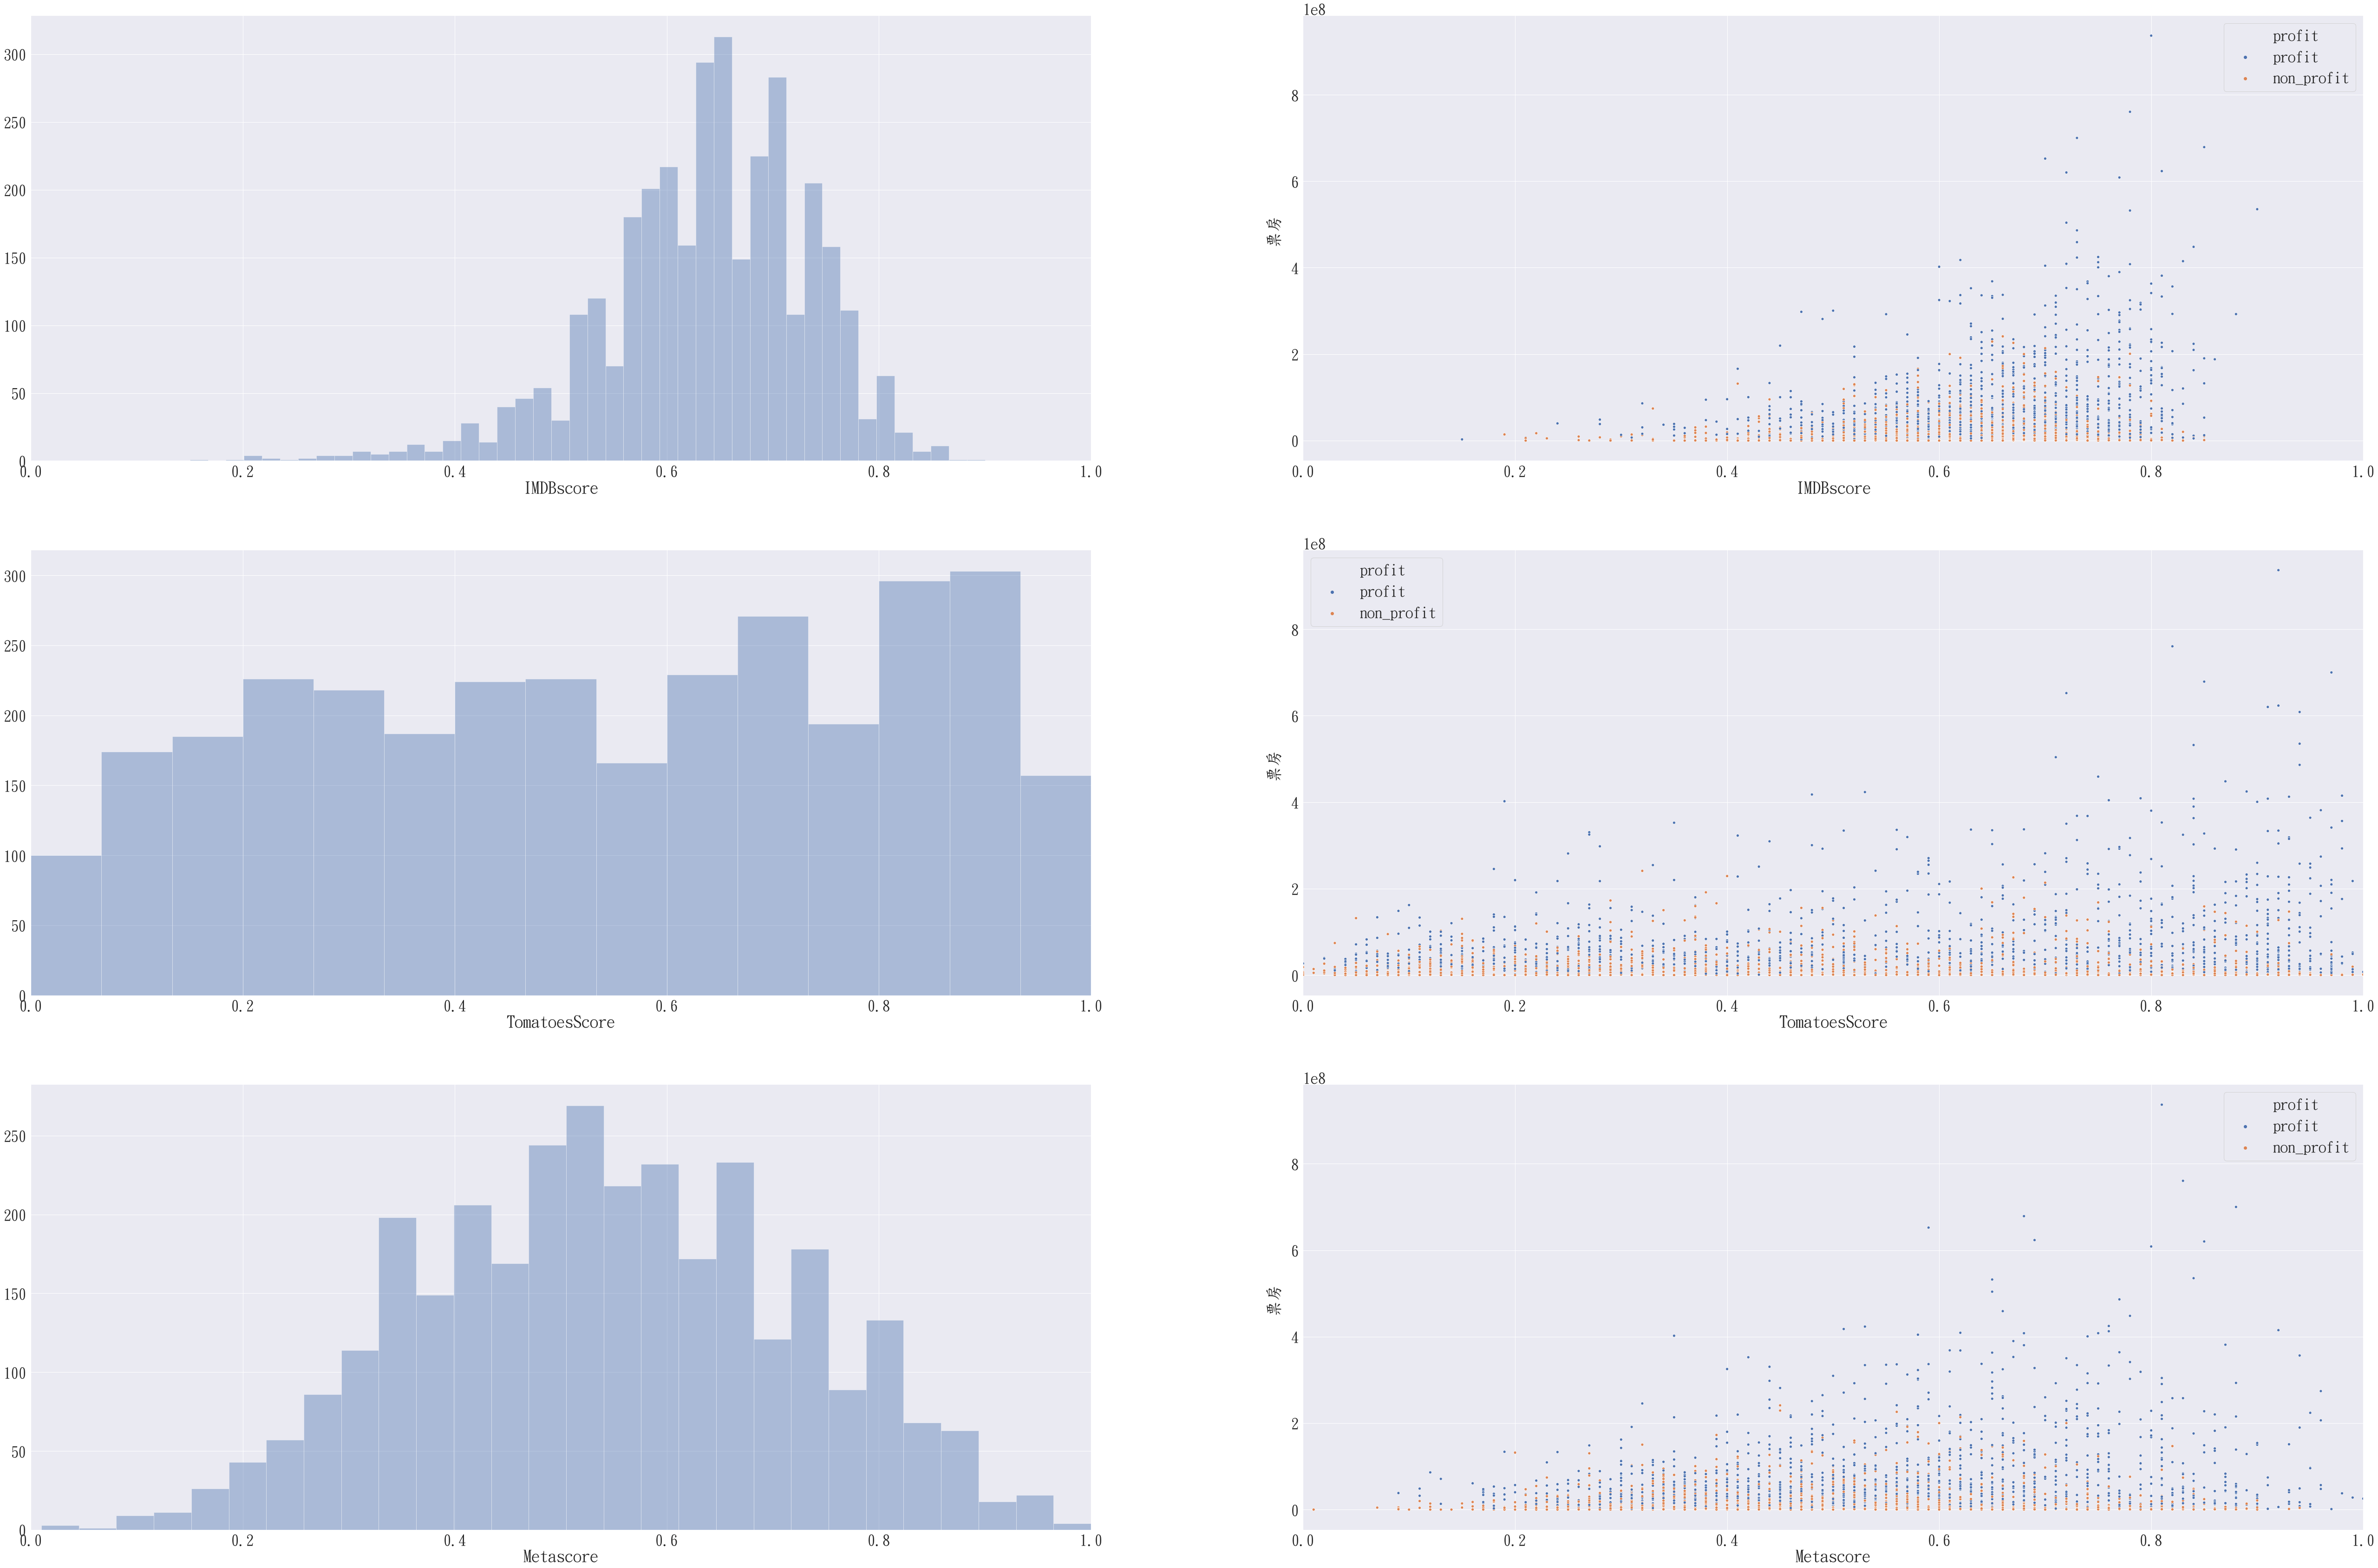

In [20]:
#關注電影評分
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=14)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(90,60)},font_scale=3)#11.7,8.27

plt.figure()

ax1=plt.subplot(3,2,1)
plt.xlim(0, 1)
ax2=plt.subplot(3,2,2)
plt.xlim(0, 1)
plot=sns.distplot(data_use["IMDBscore"][data_use["IMDBscore"].notna()],kde=False,norm_hist=False,ax=ax1)
plot=sns.scatterplot(x="IMDBscore",y="票房",data=data_use,hue="profit",ax=ax2)

ax3=plt.subplot(3,2,3)
plt.xlim(0, 1)
ax4=plt.subplot(3,2,4)
plt.xlim(0, 1)
plot=sns.distplot(data_use["TomatoesScore"][data_use["TomatoesScore"].notna()],kde=False,norm_hist=False,ax=ax3)
plot=sns.scatterplot(x="TomatoesScore",y="票房",data=data_use,hue="profit",ax=ax4)

ax5=plt.subplot(3,2,5)
plt.xlim(0, 1)
ax6=plt.subplot(3,2,6)
plt.xlim(0, 1)
plot=sns.distplot(data_use["Metascore"][data_use["Metascore"].notna()],kde=False,norm_hist=False,ax=ax5)
plot=sns.scatterplot(x="Metascore",y="票房",data=data_use,hue="profit",ax=ax6)

fig=plot.get_figure()
fig.savefig("關注評分.jpg",dpi=300)

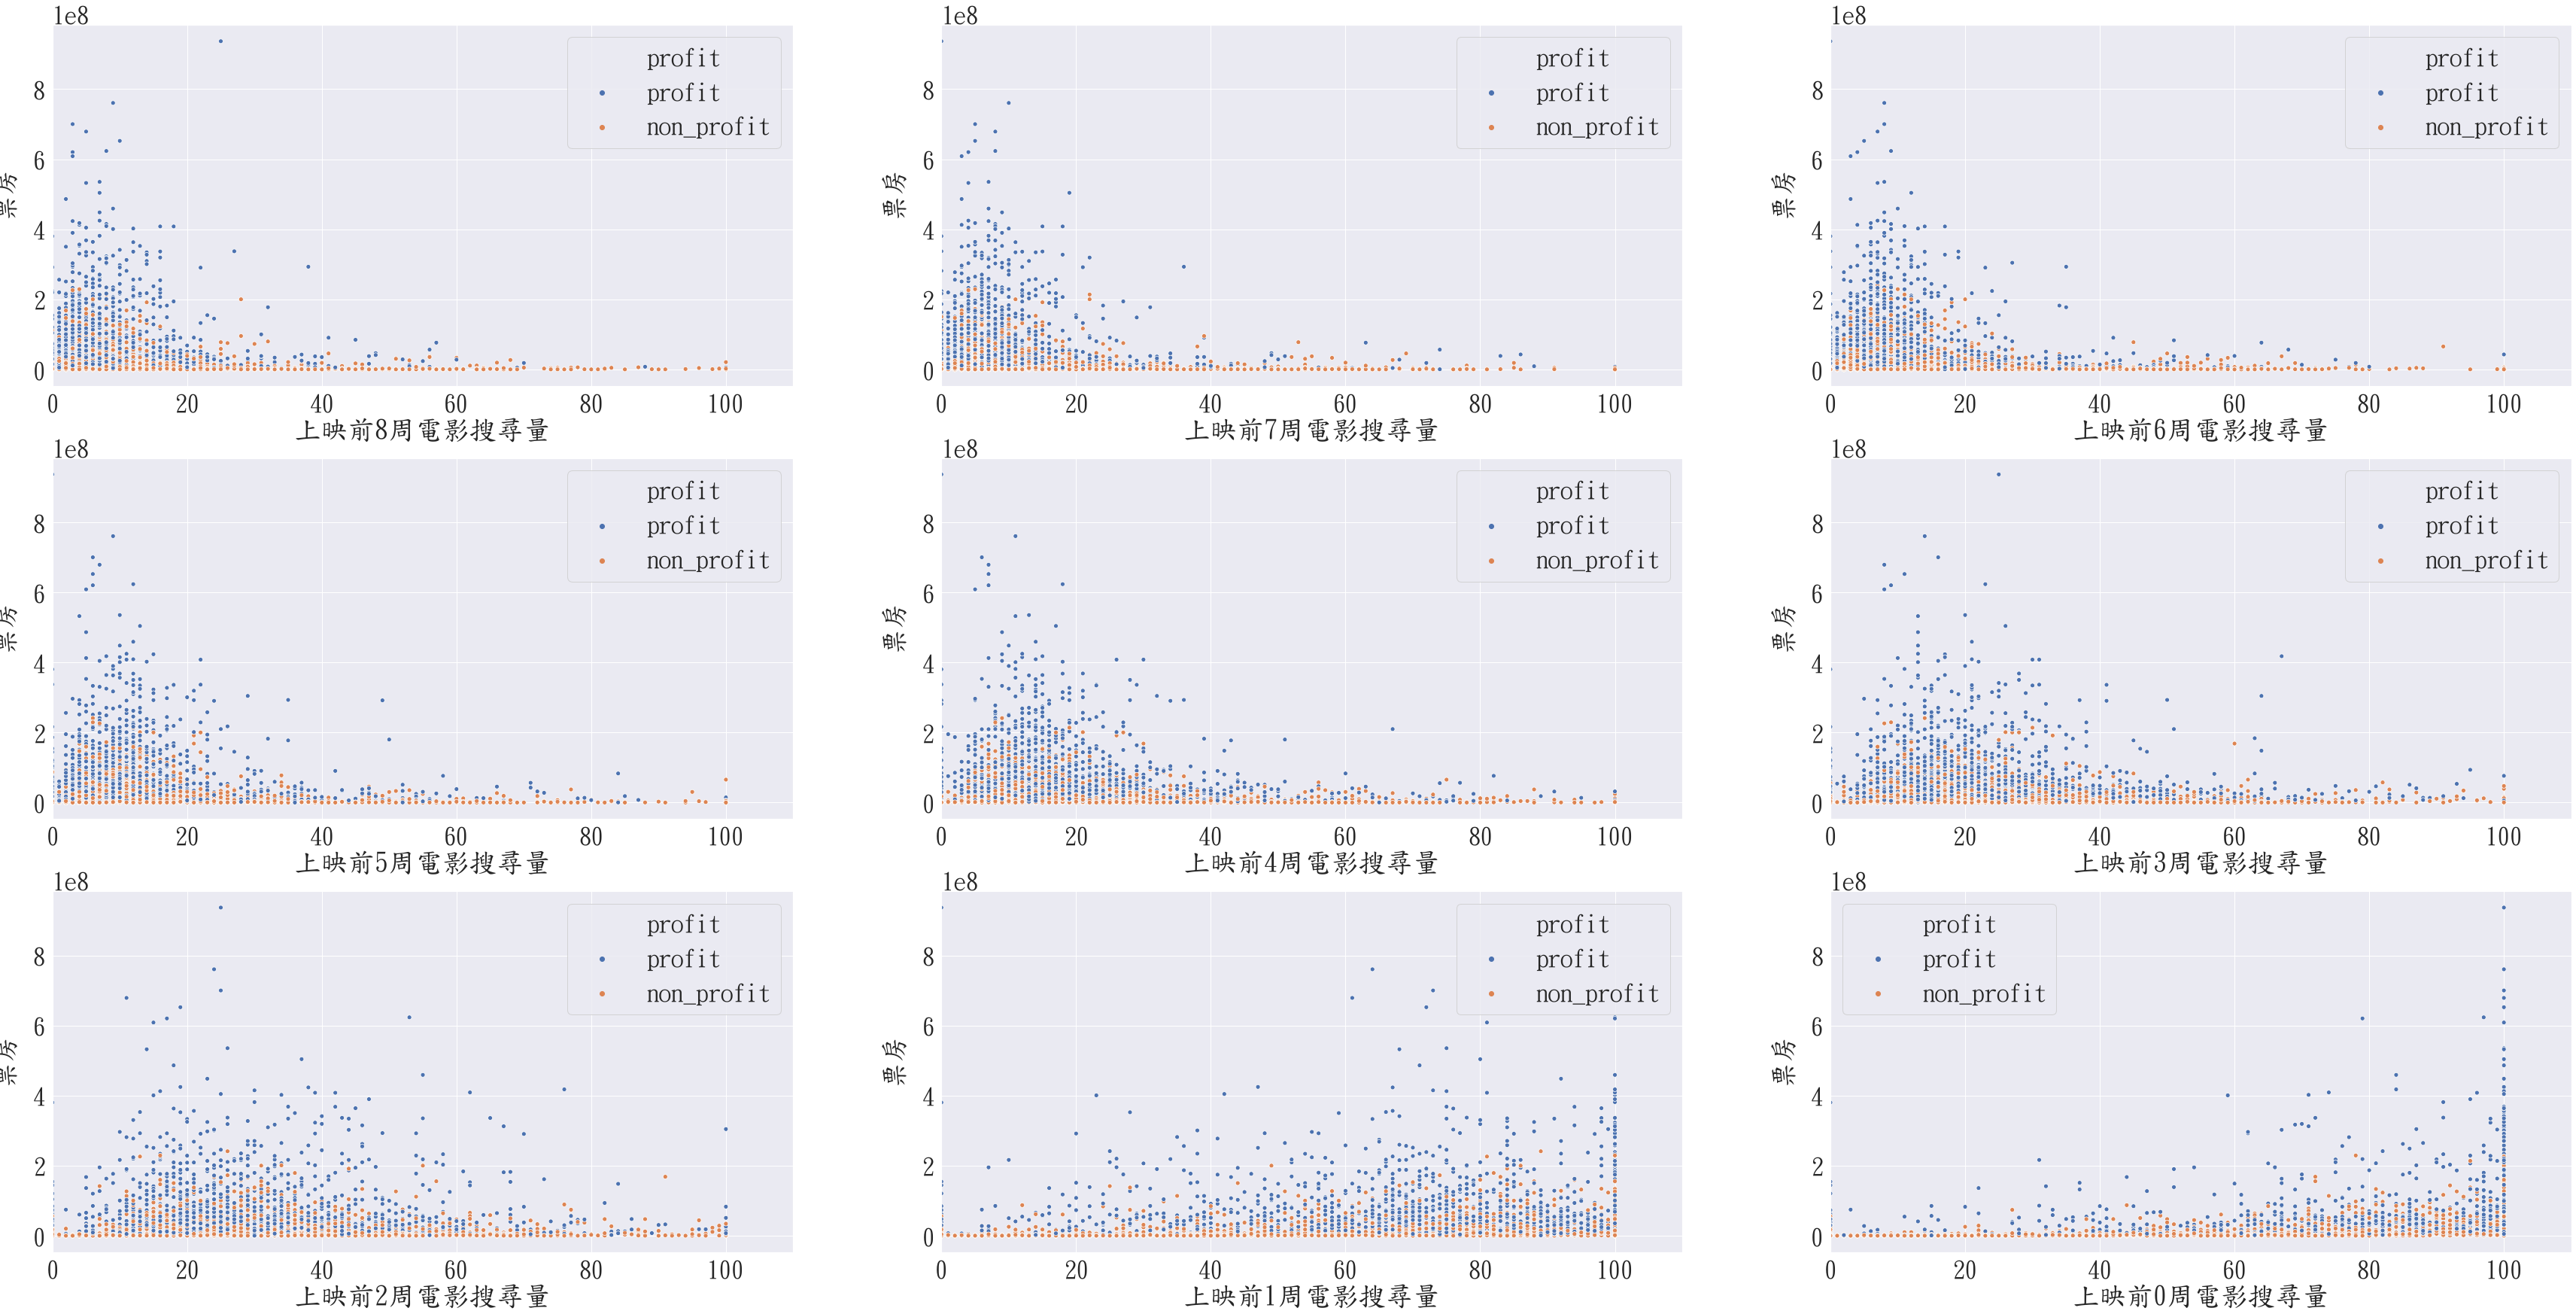

In [21]:
#關注電影搜尋量
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=20)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(60,30)},font_scale=3)#11.7,8.27


plt.figure()

ax=[]
for i in range(1,10): 
    ax.append(plt.subplot(3,3,i))
    plt.xlim(0, 110)
i=0
for col in [
      '上映前8周電影搜尋量', '上映前7周電影搜尋量', '上映前6周電影搜尋量',
       '上映前5周電影搜尋量', '上映前4周電影搜尋量', '上映前3周電影搜尋量', '上映前2周電影搜尋量', '上映前1周電影搜尋量','上映前0周電影搜尋量'
       ]:
#sns.distplot(data_use["movie_8_before"],)
    plot=sns.scatterplot(x=col,y="票房",data=data_use,hue="profit",ax=ax[i])
    i+=1
fig=plot.get_figure()
fig.savefig("關注電影搜尋量.jpg",dpi=500)

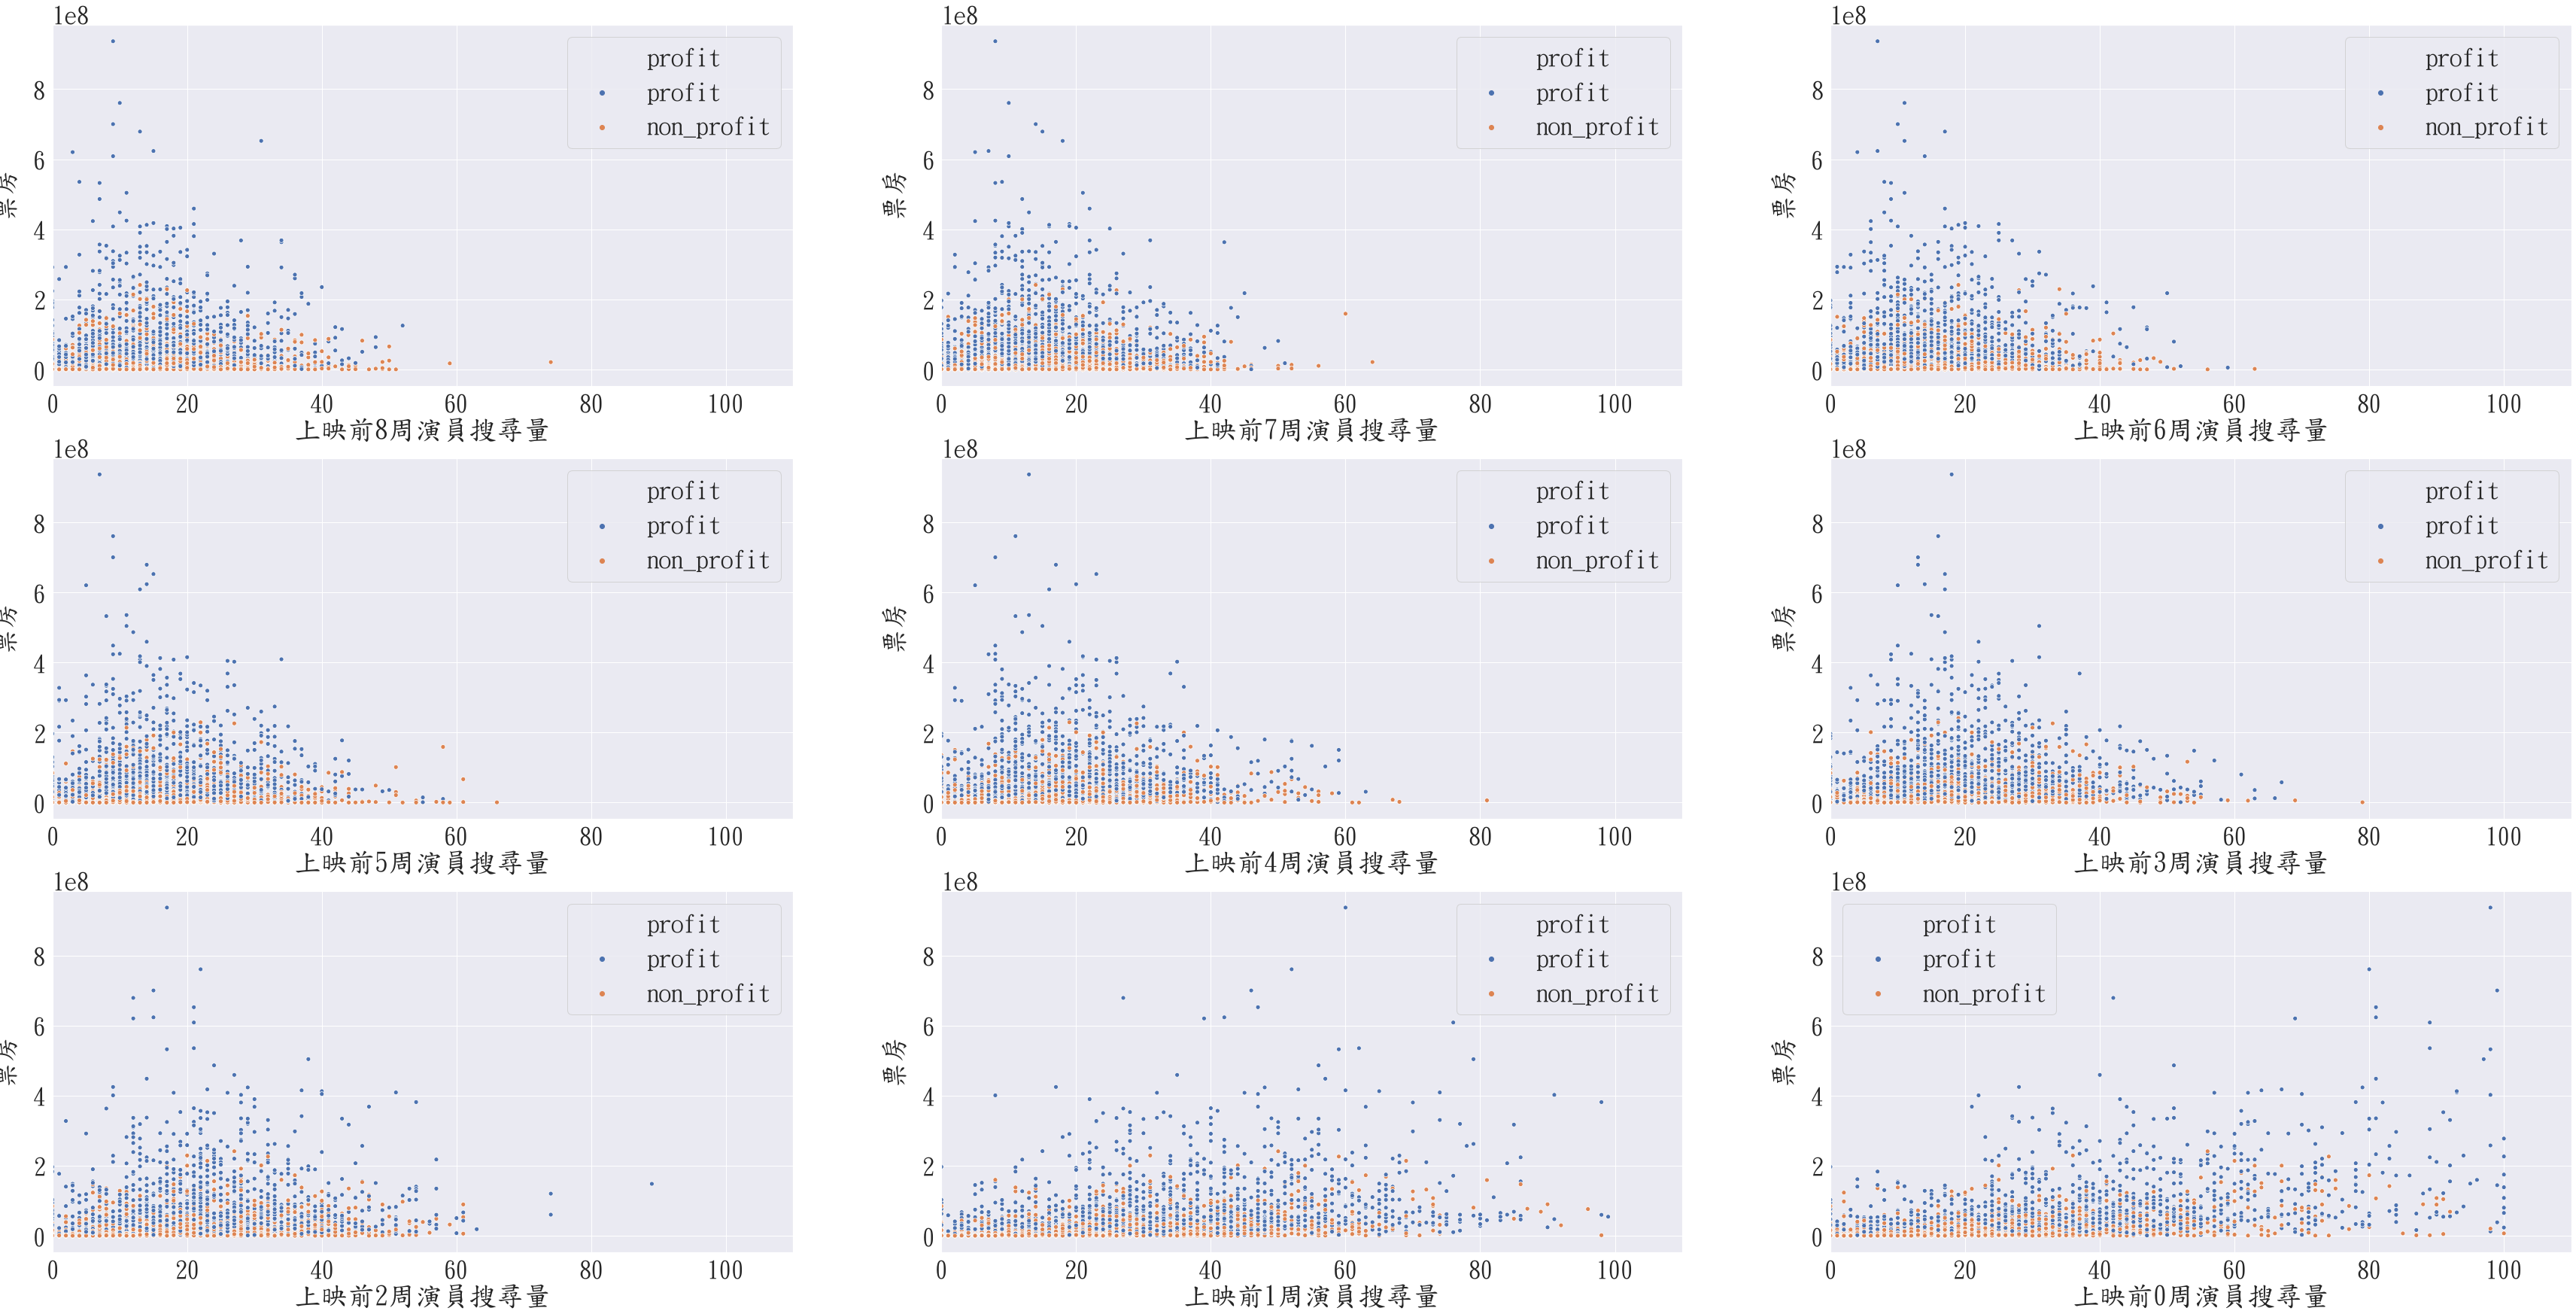

In [22]:
#關注演員搜尋量
myfont=FontProperties(fname=r'C:\Windows\Fonts\kaiu.ttf',size=20)#中文字體
sns.set(font=myfont.get_name(),rc={'figure.figsize':(60,30)},font_scale=3)#11.7,8.27
plt.figure()

ax=[]
for i in range(1,10): 
    ax.append(plt.subplot(3,3,i))
    plt.xlim(0, 110)
i=0

for col in [
        '上映前8周演員搜尋量', '上映前7周演員搜尋量', '上映前6周演員搜尋量', '上映前5周演員搜尋量',
       '上映前4周演員搜尋量', '上映前3周演員搜尋量', '上映前2周演員搜尋量', '上映前1周演員搜尋量', '上映前0周演員搜尋量'
       ]:
#sns.distplot(data_use["movie_8_before"],)
    plot=sns.scatterplot(x=col,y="票房",data=data_use,hue="profit",ax=ax[i])
    i+=1

fig=plot.get_figure()
fig.savefig("關注演員搜尋量.jpg",dpi=500)